In [1]:
import os
os.chdir("..")

import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import keras

from src.processing import DataPrep, Scaler
from src import model, KFold

2022-12-06 13:34:54.826778: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-06 13:34:54.912350: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/usr/local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2022-12-06 13:34:56.617002: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/workdir/src/model/k_fold.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  split_array: NDArray = np.array(split_data)
2022-12-06 13:34:56.821893: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2022-12-06 13:34:56.839838: W tensorflow/c/c_api.cc:291] Operation '{name:'training/Adam/Output/Prediction/bias/v/Assign' id:296 op device:{requested: '', assig

Base metric: 1576.3524811073096
1691.2021611859418


/usr/local/lib/python3.10/site-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2022-12-06 13:34:58.240448: W tensorflow/c/c_api.cc:291] Operation '{name:'loss/mul' id:120 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/Output/Prediction_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/usr/local/lib/python3.10/site-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_

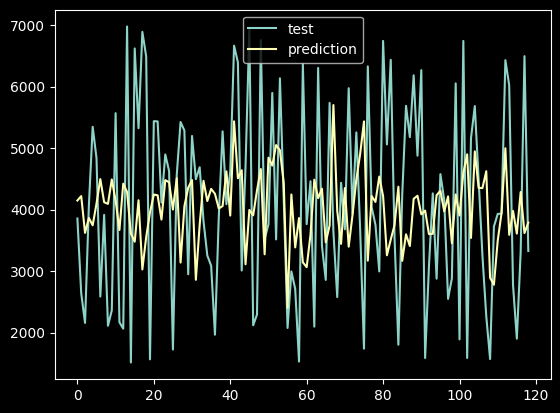

Base metric: 1586.3413107416293
1605.9954342231995


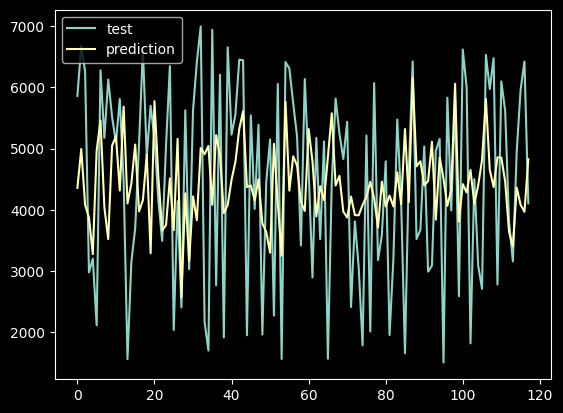

Base metric: 1599.4122392716201
1586.7141014784322


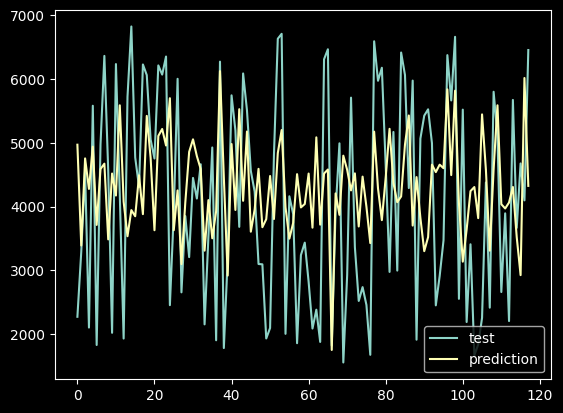

Base metric: 1639.5310816060878
1523.372703598104


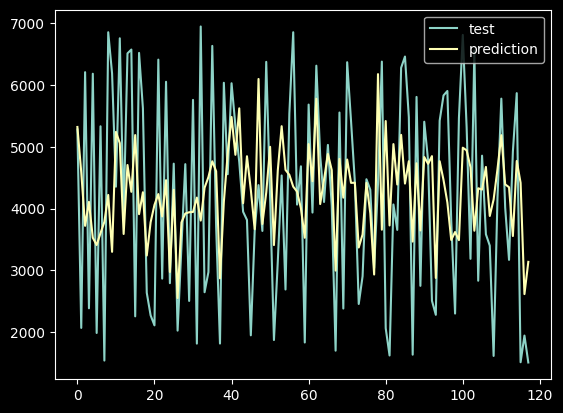

In [2]:
def main():
    ds = DataPrep("data/jobss.csv")
    #ds.get_df_report("preprocessed")
    ds()
    #ds.get_df_report("processed")
    ds.processed_export()
    df = ds.df

    target_col = "sal"
    rmse = tf.keras.metrics.RootMeanSquaredError()
    kfold = KFold(n_folds=4, model=model, optimizer="adam", loss="mse", metrics=["accuracy"])
    results = kfold(Scaler, df, target_col, verbose=False)


if __name__ == "__main__":
    main()
